# 4.10: Coding Etiquette and Excel Reporting - Part 1

### This script contains the following points:

#### 1. Import libraries and data
#### 2. Consider security implications
#### 3. Create a regional segmentation of data
#### 4. Create an exclusion flag for low activity customers
#### 5. Create a profiling variabe based on age, income, certain goods in the 'department_id' column, and number of dependents
#### 6. Create an appropriate visualizations to show the distribution of profiles.
#### 7. Aggregate the max, mean, and min variables for usage frequency and expenditure.
#### 8. Compare customer profile with regions and departments.
#### 9. Produce suitable charts to illustrate results.

## 01 Import Libraries and Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy

In [2]:
# import data
path = r'I:\CF\Immersion into Data Analystics\4 Python Fundamentals for Data Analysts\Instacart Basket Analysis'

In [3]:
path

'I:\\CF\\Immersion into Data Analystics\\4 Python Fundamentals for Data Analysts\\Instacart Basket Analysis'

In [4]:
df_icba = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_data_merged3.pkl'))

# 02 Consider security implications

In [5]:
# checking data output
df_icba.head()

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,spender_flag,customer_frequency,frequency_flag,Gender,STATE,Age,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Low spender,20.5,Non-Frequent Customer,Female,Alabama,31,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Low spender,20.5,Non-Frequent Customer,Female,Alabama,31,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,...,Low spender,20.5,Non-Frequent Customer,Female,Alabama,31,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Low spender,20.5,Non-Frequent Customer,Female,Alabama,31,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,...,Low spender,20.5,Non-Frequent Customer,Female,Alabama,31,3,married,40423,both


### First and last names were PII data, but they were previously dropped prior to data merging


# 03 Create a regional segmentation of the data. Determine whether there is a difference in spending habits between the different US regions.

In [6]:
# define regions
region1 = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
region2 = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
region3 = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
region4 = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [7]:
# implimenting regions and creating new column
df_icba.loc[df_icba['STATE'].isin(region1), 'Region'] = 'Northeast'
df_icba.loc[df_icba['STATE'].isin(region2), 'Region'] = 'Midwest'
df_icba.loc[df_icba['STATE'].isin(region3), 'Region'] = 'South'
df_icba.loc[df_icba['STATE'].isin(region4), 'Region'] = 'West'

In [8]:
# checking output
df_icba['Region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

In [9]:
df_icba.shape

(32404859, 31)

In [10]:
df_icba['customer_id'].nunique()

206209

In [11]:
#reducing columns and dropping duplicates
df_icba.columns

Index(['order_id', 'customer_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc',
       'Busiest Days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spender_flag', 'customer_frequency', 'frequency_flag',
       'Gender', 'STATE', 'Age', 'n_dependants', 'fam_status', 'income',
       '_merge', 'Region'],
      dtype='object')

In [12]:
df_icba2 = df_icba.drop(columns = ['order_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc',
       'Busiest Days', 'busiest_period_of_day', 'mean_price', '_merge'])

In [13]:
# checking output
df_icba2.columns

Index(['customer_id', 'max_order', 'loyalty_flag', 'spender_flag',
       'customer_frequency', 'frequency_flag', 'Gender', 'STATE', 'Age',
       'n_dependants', 'fam_status', 'income', 'Region'],
      dtype='object')

In [14]:
# checking duplicates
df_dups = df_icba2[df_icba2.duplicated()]

In [15]:
df_dups.shape

(32198650, 13)

In [16]:
#removing duplicates
df_nodups = df_icba2.drop_duplicates()

In [17]:
# checking output
df_nodups.shape

(206209, 13)

In [18]:
# comparing region information with spending flag
pd.crosstab(df_nodups['Region'], df_nodups['spender_flag'], dropna = False)

spender_flag,High spender,Low spender
Region,,
Midwest,1263,47256
Northeast,883,35505
South,1817,66920
West,1394,51171


In [19]:
# rerunning crosstab with column normalization
pd.crosstab(df_nodups['Region'], df_nodups['spender_flag'], normalize = 'columns', dropna = False)

spender_flag,High spender,Low spender
Region,,
Midwest,0.235766,0.235278
Northeast,0.164831,0.176772
South,0.339182,0.333181
West,0.260220,0.254770


### South regions has the highest percentage of high spenders, followed by the West, Midwest, and Northeast. This order also applies to the percentage of low spenders. The percentages are most likely associated by the size/population of the regions.

# 04 Create an exclusion flag for low-activity customers (<5 order) and exclude them from the data. Export this sample.

In [20]:
# creating activity flag
df_icba.loc[df_icba['max_order'] <= 5, 'activity_flag'] = 'Low Activity'
df_icba.loc[df_icba['max_order'] > 5, 'activity_flag'] = 'High Activity'

In [21]:
df_icba['activity_flag'].value_counts(dropna = False)

High Activity    30171424
Low Activity      2233435
Name: activity_flag, dtype: int64

In [22]:
# removing rows with 'max_order' <= 5; activity flag wasn't really necessary
df_icba3 = df_icba.drop(df_icba[df_icba.max_order <= 5].index)

In [23]:
# checking output
df_icba3.shape

(30171424, 32)

In [24]:
df_icba3.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity.pkl'))

# 05 Create profile variabes based on age, income, certain goods in the 'department_id' column, and number of dependents.

In [25]:
df_icba4 = df_icba3

#### creating profile variable 'work_status', which will categorize customers as students, workers, or retired.

In [26]:
# on assumption that students and retired people will not be being products
result = []

for value in df_icba4['department_id']:
    if value == 18:
        result.append(1)
    else:
        result.append(0)

In [27]:
df_icba4['babies'] = result

In [28]:
# creating column with aggregated data
df_icba4['parent'] = df_icba4.groupby(['customer_id'])['babies'].transform(np.sum)

In [29]:
pd.options.display.max_rows = None

In [30]:
pd.options.display.max_columns = None

In [31]:
df_icba4.head()

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,Busiest Days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spender_flag,customer_frequency,frequency_flag,Gender,STATE,Age,n_dependants,fam_status,income,_merge,Region,activity_flag,babies,parent
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid range product,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,Female,Alabama,31,3,married,40423,both,South,High Activity,0,0
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,Female,Alabama,31,3,married,40423,both,South,High Activity,0,0
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,Female,Alabama,31,3,married,40423,both,South,High Activity,0,0
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,Female,Alabama,31,3,married,40423,both,South,High Activity,0,0
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,Female,Alabama,31,3,married,40423,both,South,High Activity,0,0


In [32]:
# checking data
df_icba4['parent'].value_counts(dropna = False)

0      20467796
1       1819763
2        937224
3        610630
4        488603
5        394990
6        328720
7        275080
8        267641
9        221337
10       207641
11       181066
12       164998
13       161572
14       147448
15       129135
17       116831
16       112637
19       109774
18       101216
20        86087
22        85128
21        85028
24        80836
23        73916
28        69688
26        68068
25        65278
27        60053
31        58744
29        56760
36        56199
32        55496
30        53253
33        52583
35        52000
34        50375
37        49664
39        45968
41        40157
46        40104
48        38545
45        37198
40        36738
44        36609
42        36136
56        34353
38        34124
43        33797
49        33089
47        29734
51        27063
54        26912
53        26362
52        26029
58        24526
50        24484
55        22932
61        22859
57        22166
59        21977
65        21423
73      

In [33]:
df_icba4.shape

(30171424, 34)

In [34]:
# defining function for 'work_status' columns
def work_label(row):
    if (row['n_dependants'] == 0) and (row['Age'] <= 24) and (row['income'] <= 40000) and (row['parent'] == 0):
        return 'Student'
    elif (row['n_dependants'] == 0) and (row['Age'] >= 65) and (row['income'] >= 40000) and (row['parent'] == 0):
        return 'Retired'
    else: return 'Worker'

In [35]:
# creating 'work_status' column
df_icba4['work_status'] = df_icba4.apply(work_label, axis=1)

In [36]:
# checking output
df_icba4['work_status'].value_counts(dropna = False)

Worker     28858115
Retired     1268004
Student       45305
Name: work_status, dtype: int64

In [37]:
# checking columns to remove unnecessary columns
df_icba4.columns

Index(['order_id', 'customer_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc',
       'Busiest Days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spender_flag', 'customer_frequency', 'frequency_flag',
       'Gender', 'STATE', 'Age', 'n_dependants', 'fam_status', 'income',
       '_merge', 'Region', 'activity_flag', 'babies', 'parent', 'work_status'],
      dtype='object')

In [38]:
# removing unnecessary columns, python kept freezing unless I made new dataframe
df_icba5 =df_icba4.drop(columns =['babies', 'parent', '_merge'])

In [39]:
# checking output
df_icba5.columns

Index(['order_id', 'customer_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc',
       'Busiest Days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spender_flag', 'customer_frequency', 'frequency_flag',
       'Gender', 'STATE', 'Age', 'n_dependants', 'fam_status', 'income',
       'Region', 'activity_flag', 'work_status'],
      dtype='object')

#### importing and merging department and product data based on next set of questions

In [40]:
# importing department data
df_depts = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [41]:
# importing products data
df_prods = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'products_checked_short.csv'))

In [42]:
# checking data
df_depts.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [43]:
# merging department data
df_icba5 =df_icba5.merge(df_depts, on ='department_id')

In [44]:
# checking output
df_icba5.head()

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,Busiest Days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spender_flag,customer_frequency,frequency_flag,Gender,STATE,Age,n_dependants,fam_status,income,Region,activity_flag,work_status,department
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid range product,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,High Activity,Worker,beverages
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,High Activity,Worker,beverages
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,High Activity,Worker,beverages
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,High Activity,Worker,beverages
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,High Activity,Worker,beverages


In [45]:
# merging products data
df_icba5 = df_icba5.merge(df_prods, on ='product_id')

In [46]:
# aggregating department data by mode
df_icba5['common_department'] = df_icba5.groupby(['customer_id'])['department_id'].transform(lambda x: x.mode()[0])

In [47]:
# aggregating product data by mode
df_icba5['common_product'] = df_icba5.groupby(['customer_id'])['product_id'].transform(lambda x: x.mode()[0])

In [48]:
# checking output
df_icba5.head()

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name_x,aisle_id,department_id,prices,price_range_loc,Busiest Days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spender_flag,customer_frequency,frequency_flag,Gender,STATE,Age,n_dependants,fam_status,income,Region,activity_flag,work_status,department,product_name_y,common_department,common_product
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid range product,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,High Activity,Worker,beverages,Soda,19,196
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,High Activity,Worker,beverages,Soda,19,196
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,High Activity,Worker,beverages,Soda,19,196
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,High Activity,Worker,beverages,Soda,19,196
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,High Activity,Worker,beverages,Soda,19,196


In [49]:
# exporting data
df_icba5.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Finalall.pkl'))

In [50]:
# checking data to create smaller subset of data
df_icba5.columns

Index(['order_id', 'customer_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name_x',
       'aisle_id', 'department_id', 'prices', 'price_range_loc',
       'Busiest Days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spender_flag', 'customer_frequency', 'frequency_flag',
       'Gender', 'STATE', 'Age', 'n_dependants', 'fam_status', 'income',
       'Region', 'activity_flag', 'work_status', 'department',
       'product_name_y', 'common_department', 'common_product'],
      dtype='object')

In [51]:
# dropping columns for new dataframe
df_custagg = df_icba5.drop(columns = ['order_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name_x',
       'aisle_id', 'department_id', 'prices', 'price_range_loc',
       'Busiest Days', 'busiest_period_of_day', 'department',
       'product_name_y'])

In [52]:
# checking output
df_custagg.head()

,customer_id,max_order,loyalty_flag,mean_price,spender_flag,customer_frequency,frequency_flag,Gender,STATE,Age,n_dependants,fam_status,income,Region,activity_flag,work_status,common_department,common_product
0,1,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,High Activity,Worker,19,196
1,1,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,High Activity,Worker,19,196
2,1,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,High Activity,Worker,19,196
3,1,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,High Activity,Worker,19,196
4,1,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,High Activity,Worker,19,196


In [53]:
df_custagg.shape

(30172412, 18)

In [54]:
# dropping duplicates
df_custagg = df_custagg.drop_duplicates()

In [55]:
# checking output
df_custagg.shape

(146466, 18)

# 06 Create an appropriate visualization to show the distribution of profiles

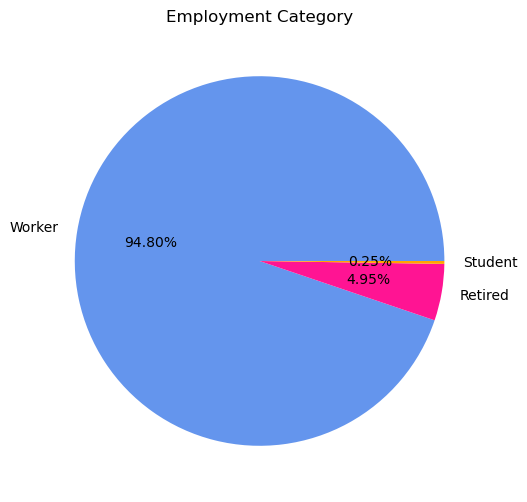

In [56]:
# creating pie chart of 'work_status' profile
workpie = df_custagg['work_status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', figsize=(6,6), title = 'Employment Category', label='', colors =['cornflowerblue', 'deeppink', 'orange'])

In [57]:
# exporting figure
workpie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'TaskFinal', 'employmentpie.png'))

# 07 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [58]:
# checking columns
df_custagg.columns

Index(['customer_id', 'max_order', 'loyalty_flag', 'mean_price',
       'spender_flag', 'customer_frequency', 'frequency_flag', 'Gender',
       'STATE', 'Age', 'n_dependants', 'fam_status', 'income', 'Region',
       'activity_flag', 'work_status', 'common_department', 'common_product'],
      dtype='object')

In [59]:
# aggregating for expenditure, 'mean_price' is the average each customer spends, expenditure average will take all averages from each customer in 'work status' profile
df_custagg.groupby('work_status').agg({'mean_price': ['mean', 'min', 'max']})

mean_price                        
                  mean       min           max
work_status                                   
Retired      14.547726  1.308333  14042.512281
Student       6.311649  3.585714      7.000000
Worker       12.126679  1.000000  15006.940000

#### Retired peoples spend the most, followed by people in the workforce; students spend the least, almost half of what adults in the workforce spend

In [60]:
# aggregating for frequency
df_custagg.groupby('work_status').agg({'customer_frequency': ['mean', 'min', 'max']})

customer_frequency           
                          mean  min   max
work_status                              
Retired              13.521805  0.5  30.0
Student              15.387534  1.0  30.0
Worker               13.095257  0.0  30.0

#### Although students spend the least money, they order the most frequently on average. Workforce adults and retirees have about the same frequency as each other.

# 08 Compare your customer profiles with regions and departments.

In [61]:
# checking column names
df_custagg.head()

,customer_id,max_order,loyalty_flag,mean_price,spender_flag,customer_frequency,frequency_flag,Gender,STATE,Age,n_dependants,fam_status,income,Region,activity_flag,work_status,common_department,common_product
0,1,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,High Activity,Worker,19,196
10,15,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,0,divorced/widowed,54313,Midwest,High Activity,Retired,19,14715
15,19,9,New customer,8.372059,Low spender,6.0,Frequent customer,Female,Louisiana,62,1,married,151988,South,High Activity,Worker,1,17008
18,21,33,Regular customer,7.012683,Low spender,7.5,Frequent customer,Male,Montana,71,0,divorced/widowed,124643,West,High Activity,Retired,16,23729
19,31,20,Regular customer,8.137793,Low spender,6.0,Frequent customer,Female,Oklahoma,38,1,married,52311,South,High Activity,Worker,1,12440


In [62]:
# renaming columns to merge data
df_custagg.rename(columns = {'common_department': 'department_id'}, inplace = True)

In [63]:
# renaming columns to merge data
df_custagg.rename(columns = {'common_product': 'product_id'}, inplace = True)

In [64]:
# merging department data
df_custagg = df_custagg.merge(df_depts, on ='department_id')

In [65]:
# mergeing product data
df_custagg = df_custagg.merge(df_prods, on = 'product_id')

In [66]:
# checking output
df_custagg.head()

,customer_id,max_order,loyalty_flag,mean_price,spender_flag,customer_frequency,frequency_flag,Gender,STATE,Age,n_dependants,fam_status,income,Region,activity_flag,work_status,department_id,product_id,department,product_name
0,1,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,Female,Alabama,31,3,married,40423,South,High Activity,Worker,19,196,snacks,Soda
1,2634,12,Regular customer,6.378723,Low spender,14.0,Regular Customer,Female,Maryland,62,2,married,45745,South,High Activity,Worker,19,196,snacks,Soda
2,5055,17,Regular customer,7.367890,Low spender,21.0,Non-Frequent Customer,Male,Colorado,31,1,married,64960,West,High Activity,Worker,19,196,snacks,Soda
3,5500,56,Loyal customer,5.472727,Low spender,7.0,Frequent customer,Male,Tennessee,24,2,married,44552,South,High Activity,Worker,19,196,snacks,Soda
4,6376,7,New customer,6.397674,Low spender,30.0,Non-Frequent Customer,Male,Alabama,29,3,married,40236,South,High Activity,Worker,19,196,snacks,Soda


In [67]:
# creating crosstab of region and work_status
work_region = pd.crosstab(df_custagg['work_status'], df_custagg['Region'], normalize = 'index')

In [68]:
pd.crosstab(df_custagg['work_status'], df_custagg['Region'], normalize = 'index')

Region,Midwest,Northeast,South,West
work_status,,,,
Retired,0.225793,0.179172,0.338345,0.256690
Student,0.189189,0.175676,0.335135,0.300000
Worker,0.236428,0.175170,0.333108,0.255294


In [90]:
# creating crosstab of department and workstatus
work_depart = pd.crosstab(df_custagg['department'], df_custagg['work_status'], normalize='columns')

In [70]:
pd.crosstab(df_custagg['department'], df_custagg['work_status'], normalize = 'columns')

work_status,Retired,Student,Worker
department,,,
alcohol,0.010621,0.010811,0.009523
babies,0.000000,0.000000,0.006327
bakery,0.004552,0.002703,0.003952
beverages,0.088000,0.172973,0.080585
breakfast,0.002483,0.002703,0.002635
bulk,0.000138,0.000000,0.000043
canned goods,0.004414,0.002703,0.002887
dairy eggs,0.140000,0.094595,0.148868
deli,0.002483,0.005405,0.002987


In [71]:
# creating crosstab of department and region
dept_region = pd.crosstab(df_custagg['department'], df_custagg['Region'], normalize = 'columns')

In [72]:
pd.crosstab(df_custagg['department'], df_custagg['Region'], normalize = 'columns')

Region,Midwest,Northeast,South,West
department,,,,
alcohol,0.009001,0.009456,0.009928,0.009749
babies,0.005904,0.006459,0.006387,0.005262
bakery,0.004081,0.004436,0.003807,0.003793
beverages,0.081703,0.083894,0.079770,0.080693
breakfast,0.002721,0.002841,0.002334,0.002778
bulk,0.000000,0.000117,0.000000,0.000107
canned goods,0.002749,0.002685,0.003009,0.003285
dairy eggs,0.147864,0.146971,0.149899,0.147497
deli,0.002749,0.003074,0.002804,0.003312


# 9 Produce suitable charts to illustrate your results and export them

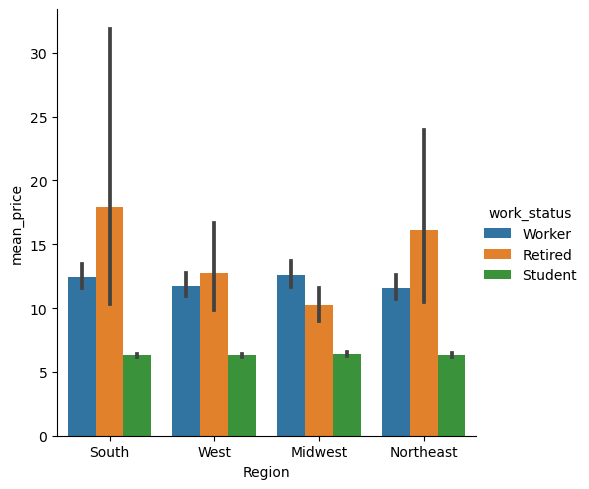

In [73]:
# creating catgory plot of region, work status, and price
region_price_status = sns.catplot(x ='Region', y= 'mean_price', kind = 'bar', hue = 'work_status', data = df_custagg)

In [74]:
# exporting figure
region_price_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'TaskFinal', 'rps_bar.png'))

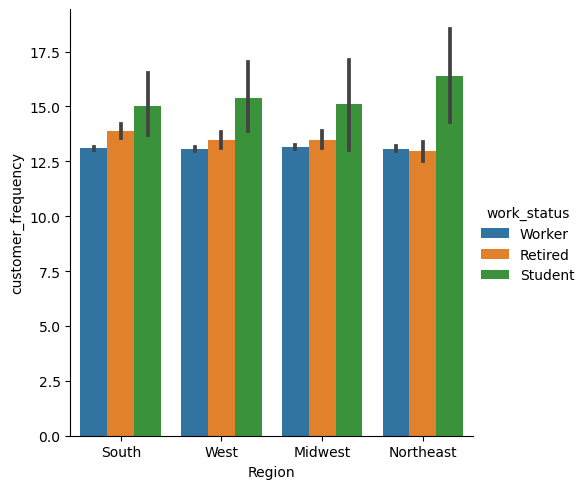

In [75]:
# creating category plot of region, work status, and frequency
region_frequency_status = sns.catplot(x ='Region', y= 'customer_frequency', kind = 'bar', hue = 'work_status', data = df_custagg)

In [76]:
# exporting figure
region_frequency_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'TaskFinal', 'rfs_bar.png'))

Text(0.5, 0, 'Work Status')

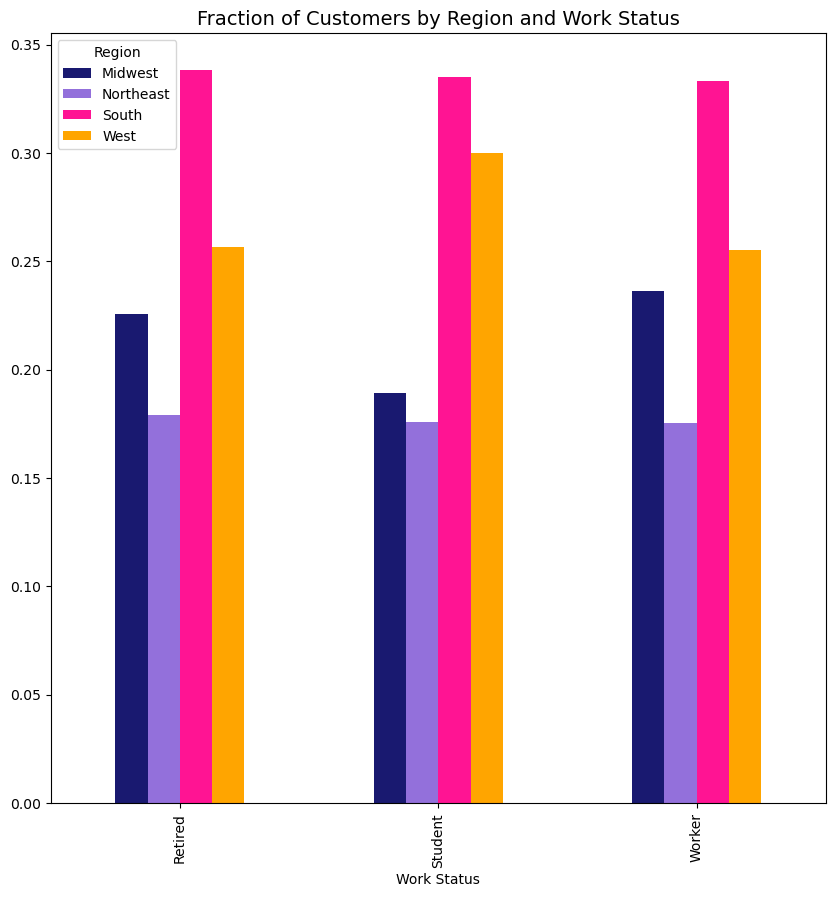

In [77]:
# creating bar chart of work status and region
work_region_bar = work_region.plot(kind = 'bar', color=['midnightblue','mediumpurple', 'deeppink', 'orange'], figsize=(10,10))

plt.title('Fraction of Customers by Region and Work Status', fontsize=14)
plt.xlabel('Work Status')

Text(0.5, 0, 'Work Status')

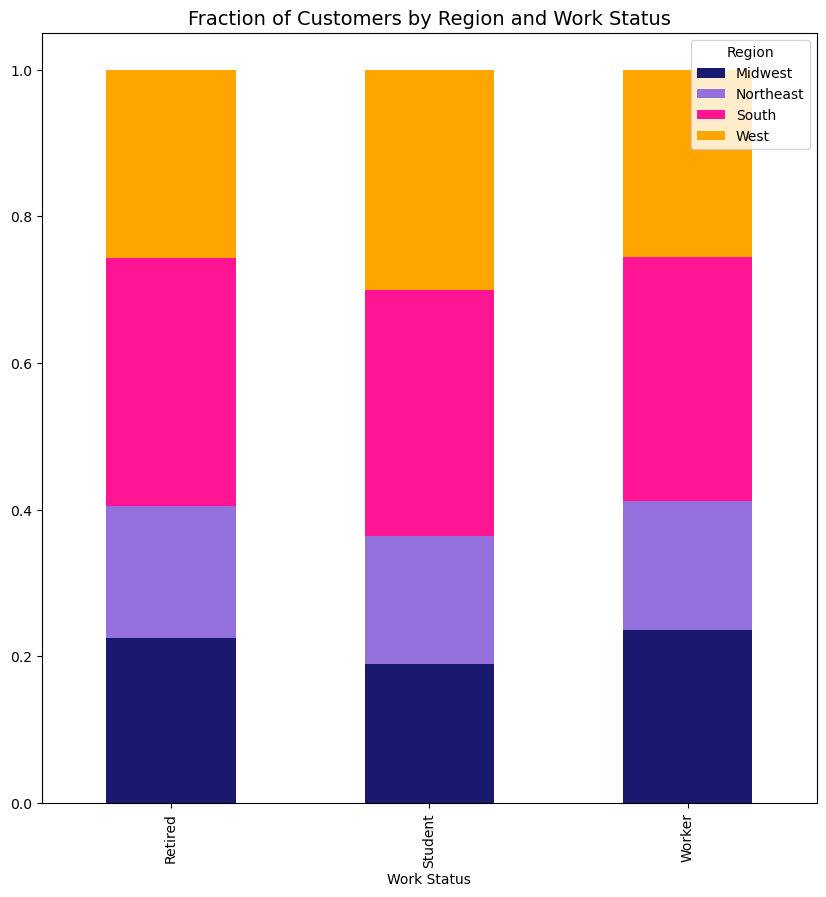

In [78]:
# creating stacked bar chart of work status and region
work_region_bar2 = work_region.plot(kind = 'bar', color=['midnightblue','mediumpurple', 'deeppink', 'orange'], stacked = True, figsize=(10,10))

plt.title('Fraction of Customers by Region and Work Status', fontsize=14)
plt.xlabel('Work Status')

In [79]:
# exporting figure
work_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'TaskFinal', 'WorkRegion_bar.png'))

In [80]:
# exporting figure
work_region_bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'TaskFinal', 'WorkRegion_bar2.png'))

Text(0.5, 0, 'Departments')

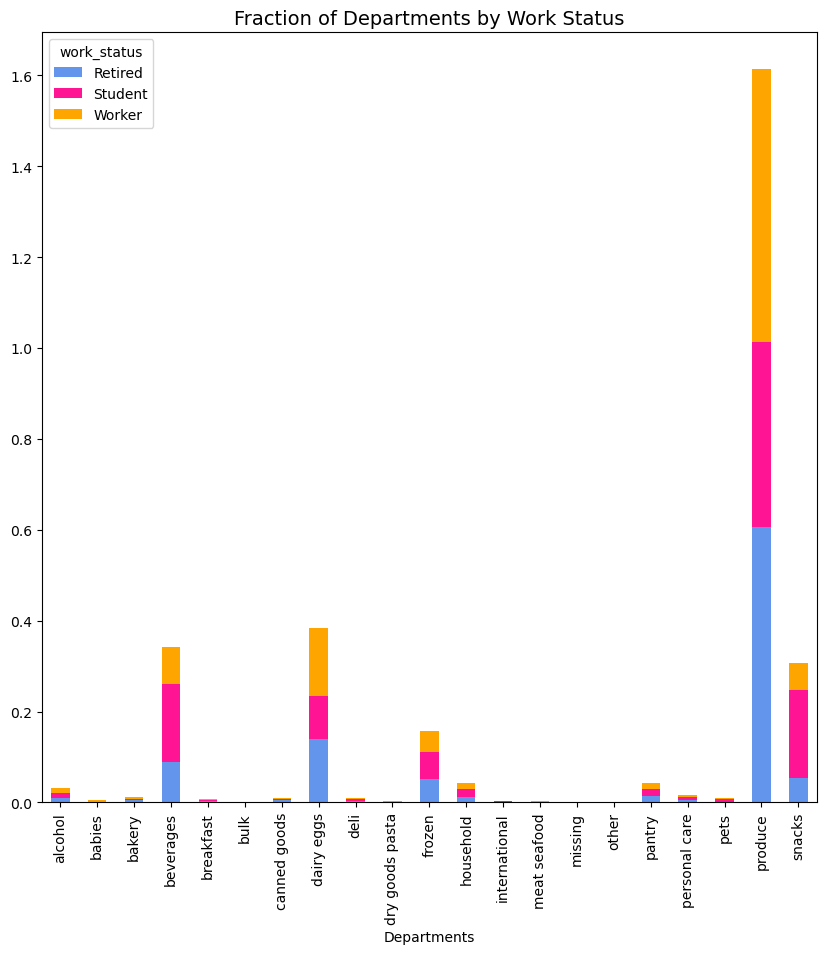

In [92]:
# creating stacked bar chart of work status and departments
work_depart_bar = work_depart.plot(kind='bar', color=['cornflowerblue', 'deeppink', 'orange'], stacked = True, figsize=(10,10))
plt.title('Fraction of Departments by Work Status', fontsize=14)
plt.xlabel('Departments')

Text(0.5, 0, 'Departments')

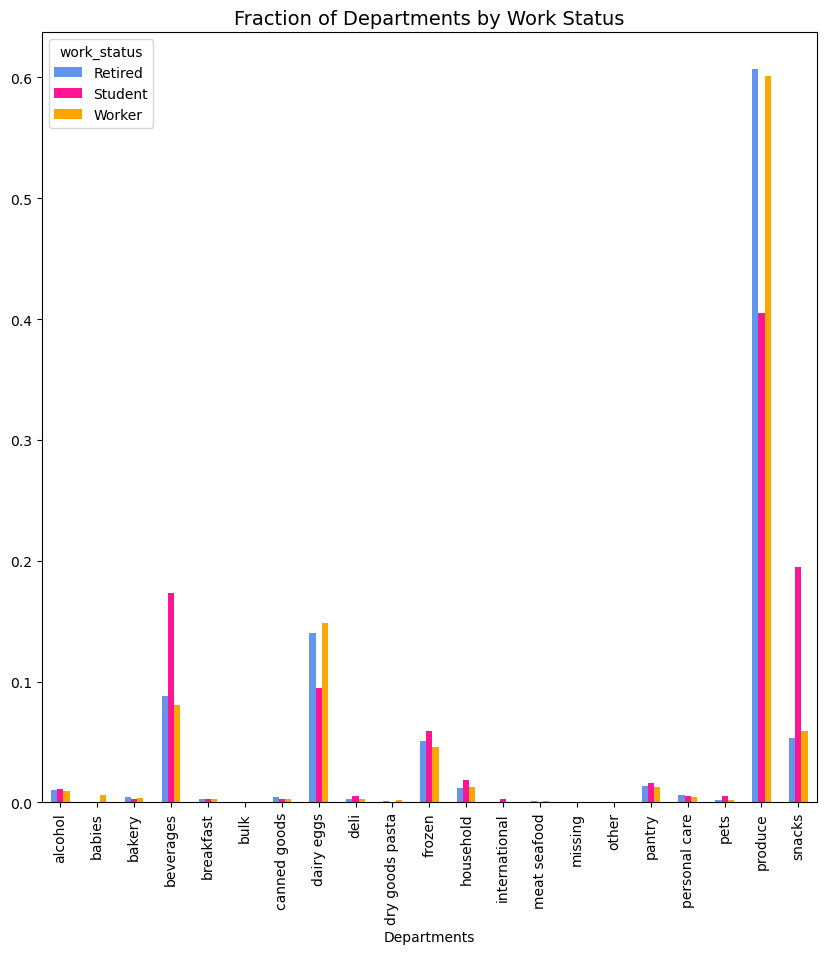

In [93]:
# creating bar chart of work status and departments
work_depart_bar2 = work_depart.plot(kind='bar', color=['cornflowerblue', 'deeppink', 'orange'], figsize=(10,10))
plt.title('Fraction of Departments by Work Status', fontsize=14)
plt.xlabel('Departments')

In [94]:
# exporting figure
work_depart_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'TaskFinal', 'WorkDepartment_bar.png'))

In [95]:
# exporting figure
work_depart_bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'TaskFinal', 'WorkDepartment_bar2.png'))

Text(0.5, 0, 'Work Status')

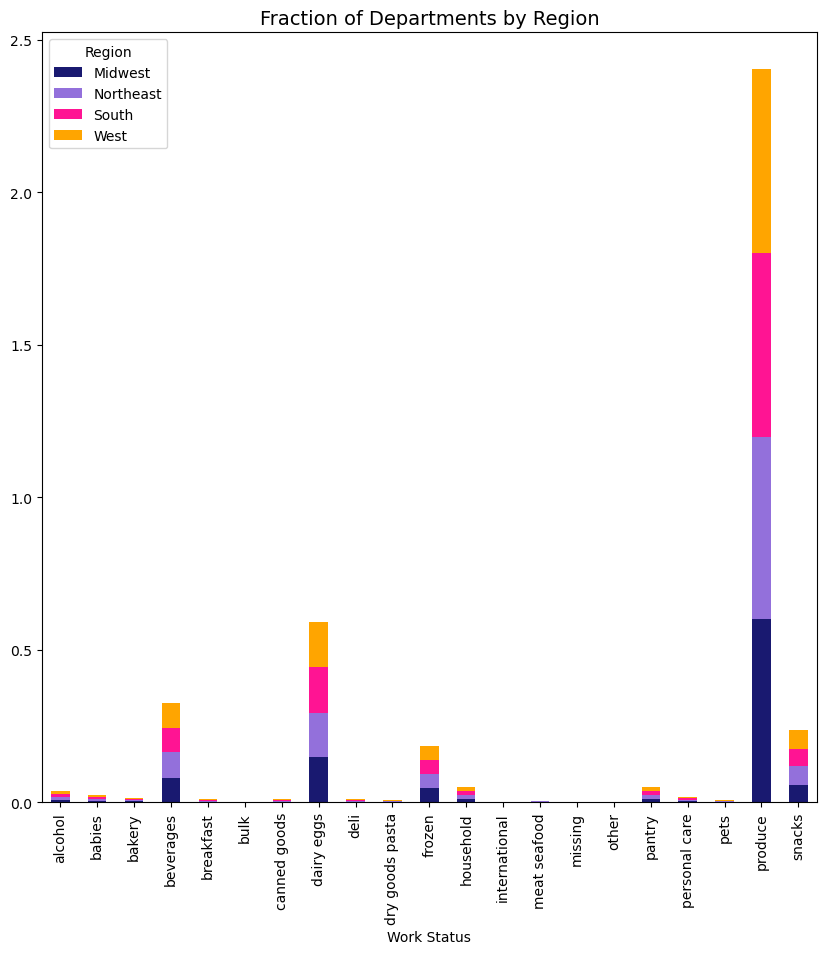

In [85]:
# creating stacked bar chart of departments by region
depart_region_bar = dept_region.plot(kind='bar', color=['midnightblue','mediumpurple', 'deeppink', 'orange'], stacked = True, figsize=(10,10))
plt.title('Fraction of Departments by Region', fontsize=14)
plt.xlabel('Work Status')

Text(0.5, 0, 'Work Status')

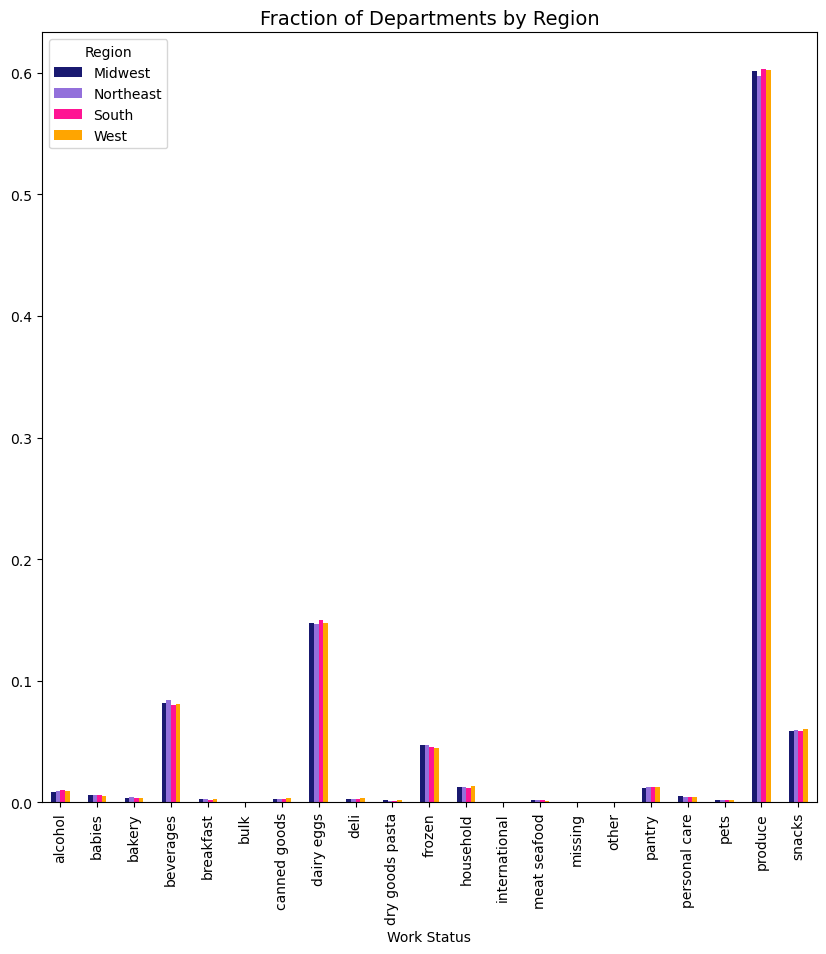

In [86]:
# creating bar chart of departments by region
depart_region_bar2 = dept_region.plot(kind='bar', color=['midnightblue','mediumpurple', 'deeppink', 'orange'], figsize=(10,10))
plt.title('Fraction of Departments by Region', fontsize=14)
plt.xlabel('Work Status')

In [87]:
# exporting figure
depart_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'TaskFinal', 'DepartmentRegion_bar.png'))

In [88]:
# exporting figure
depart_region_bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'TaskFinal', 'DepartmentRegion_bar2.png'))

# 10 Tidy up script and export final data set

In [89]:
df_custagg.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'FinalCustAgg.pkl'))